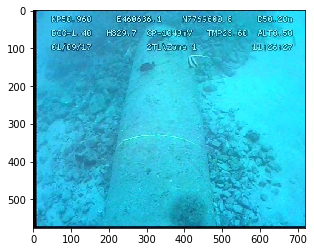

In [1]:
#filename='img18007.jpg'
filename='test.jpg'
import mxnet as mx
from mxnet import image
from gluoncv.data.transforms.presets.segmentation import test_transform
import gluoncv
from matplotlib import pyplot as plt


img = image.imread(filename)
plt.imshow(img.asnumpy())
plt.show()

In [3]:
# use cpu
ctx = mx.cpu(0)

## load test image
img = image.imread(filename)
img = test_transform(img, ctx)
img = img.astype('float32')


# reconstruct the PSP network model
model = gluoncv.model_zoo.DeepLabV3(nclass=2, backbone='resnet101')

# load the trained model
model.load_parameters('model/model_algo-1', ctx=ctx , ignore_extra=True)
#print(model.summary)

# make inference

output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()


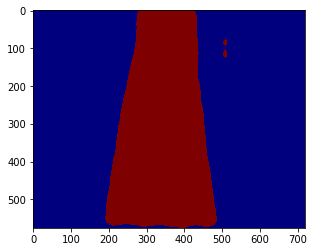

In [65]:
plt.imshow(predict, vmin=0, vmax=1, cmap='jet')
plt.show()

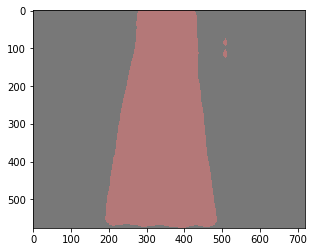

In [4]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()



# Another Approach using pretrained model out of the box

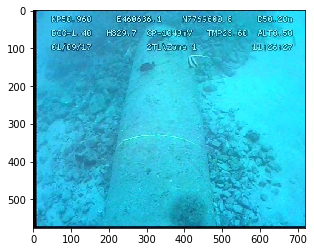

In [24]:
# use cpu
ctx = mx.cpu(0)

img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [25]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

In [26]:
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

In [27]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

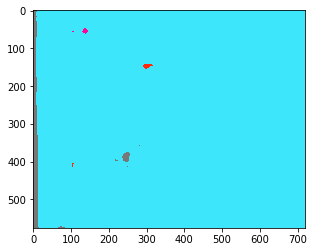

In [28]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()